In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style


In [3]:
## importing data

In [4]:
df = pd.read_excel('Air_BNB.xlsx')

In [5]:
df

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [6]:
df.drop('id',axis = 1,inplace=True)

In [7]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [8]:
print("The number of columns is " ,df.shape[1])

The number of columns is  10


In [9]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932


In [10]:
df.tail()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000
74110,Entire home/apt,4.0,1.0,moderate,0.0,f,96.0,1.0,2.0,4.852030


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  float64
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(7), object(3)
memory usage: 5.7+ MB


In [12]:
round(df.describe(),2)

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price
count,74108.00,73908.00,74107.00,57389.00,74019.00,73980.00,74111.00
mean,3.16,1.24,0.73,94.07,1.27,1.71,4.78
std,2.15,0.58,0.44,7.84,0.85,1.25,0.72
min,1.00,0.00,0.00,20.00,0.00,0.00,0.00
25%,2.00,1.00,0.00,92.00,1.00,1.00,4.32
50%,2.00,1.00,1.00,96.00,1.00,1.00,4.71
75%,4.00,1.00,1.00,100.00,1.00,2.00,5.22
max,16.00,8.00,1.00,100.00,10.00,18.00,7.60


In [13]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
accommodates,74108.0,3.16,2.15,1.0,2.00,2.00,4.00,16.0
bathrooms,73908.0,1.24,0.58,0.0,1.00,1.00,1.00,8.0
cleaning_fee,74107.0,0.73,0.44,0.0,0.00,1.00,1.00,1.0
review_scores_rating,57389.0,94.07,7.84,20.0,92.00,96.00,100.00,100.0
bedrooms,74019.0,1.27,0.85,0.0,1.00,1.00,1.00,10.0
beds,73980.0,1.71,1.25,0.0,1.00,1.00,2.00,18.0
log_price,74111.0,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [14]:
round(df.describe(include='all'),2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.0,NaN,NaN,NaN,3.16,2.15,1.0,2.0,2.0,4.0,16.0
bathrooms,73908.0,NaN,NaN,NaN,1.24,0.58,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107.0,NaN,NaN,NaN,0.73,0.44,0.0,0.0,1.0,1.0,1.0
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.07,7.84,20.0,92.0,96.0,100.0,100.0
bedrooms,74019.0,NaN,NaN,NaN,1.27,0.85,0.0,1.0,1.0,1.0,10.0
beds,73980.0,NaN,NaN,NaN,1.71,1.25,0.0,1.0,1.0,2.0,18.0
log_price,74111.0,NaN,NaN,NaN,4.78,0.72,0.0,4.32,4.71,5.22,7.6


In [15]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', nan],
      dtype=object)

In [16]:
df['room_type'].nunique()

3

In [17]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),df['room_type'].nunique())
        print()
        print(df['room_type'].value_counts())

ROOM_TYPE 3

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64
CANCELLATION_POLICY 3

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64
INSTANT_BOOKABLE 3

room_type
Entire home/apt    41308
Private room       30635
Shared room         2163
Name: count, dtype: int64


In [18]:
df.columns

Index(['room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')

In [19]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [20]:
df

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [21]:
df.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [22]:
df2 = df.copy()

In [23]:
df2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74106,Private room,1.0,1.0,flexible,0.0,f,NaN,1.0,1.0,4.605170
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [24]:
df2.drop_duplicates(inplace = True)

In [25]:
df2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,1.0,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [26]:
df2.isnull().sum()

room_type                   5
accommodates                3
bathrooms                 195
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    10215
bedrooms                   92
beds                      125
log_price                   0
dtype: int64

#    data Prepration

In [27]:
df2

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1.0,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,1.0,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,1.0,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,1.0,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,1.0,t,40.0,0.0,1.0,4.744932
...,...,...,...,...,...,...,...,...,...,...
74104,Entire home/apt,2.0,1.0,strict,1.0,f,100.0,1.0,1.0,4.356709
74107,Entire home/apt,4.0,2.0,moderate,1.0,f,93.0,2.0,4.0,5.043425
74108,Entire home/apt,5.0,1.0,moderate,1.0,t,94.0,2.0,2.0,5.220356
74109,Entire home/apt,2.0,1.0,strict,1.0,t,NaN,0.0,2.0,5.273000


In [28]:
df2 = pd.get_dummies(df2, columns = ['room_type','cancellation_policy','instant_bookable'],drop_first = True)

In [29]:
df2

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.0,1.0,1.0,5.010635,False,False,False,True,False
1,7.0,1.0,1.0,93.0,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,1.0,92.0,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,1.0,NaN,2.0,2.0,6.620073,False,False,False,False,False
4,2.0,1.0,1.0,40.0,0.0,1.0,4.744932,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.0,1.0,1.0,4.356709,False,False,False,True,False
74107,4.0,2.0,1.0,93.0,2.0,4.0,5.043425,False,False,True,False,False
74108,5.0,1.0,1.0,94.0,2.0,2.0,5.220356,False,False,True,False,True
74109,2.0,1.0,1.0,NaN,0.0,2.0,5.273000,False,False,False,True,True


# imputation of missing values

## null value treatment

In [30]:
for column in df2.columns:
    if df2[column].dtype != 'object':
       mean = df2[column].mean()
       df2[column] = df2[column].fillna(mean)

In [31]:
df_mean = df2

In [32]:
df_mean

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,False,False,False,True,False
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,False,False,False,False,False
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,False,False,False,True,False
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,False,False,True,False,False
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,False,False,True,False,True
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,False,False,False,True,True


In [33]:
df_med = df2.copy()

In [34]:
for column in df_med.columns:
    if df_med[column].dtype != 'object':
       median = df_med[column].median()
       df_med[column] = df_med[column].fillna(median)

In [35]:
df_med

,accommodates,bathrooms,cleaning_fee,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable_t
0,3.0,1.0,1.0,100.000000,1.0,1.0,5.010635,False,False,False,True,False
1,7.0,1.0,1.0,93.000000,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,1.0,92.000000,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,1.0,93.202041,2.0,2.0,6.620073,False,False,False,False,False
4,2.0,1.0,1.0,40.000000,0.0,1.0,4.744932,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
74104,2.0,1.0,1.0,100.000000,1.0,1.0,4.356709,False,False,False,True,False
74107,4.0,2.0,1.0,93.000000,2.0,4.0,5.043425,False,False,True,False,False
74108,5.0,1.0,1.0,94.000000,2.0,2.0,5.220356,False,False,True,False,True
74109,2.0,1.0,1.0,93.202041,0.0,2.0,5.273000,False,False,False,True,True


## outlier treatment

In [36]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df2)
df_knn = pd.DataFrame(data = df_imputed,columns=df2.columns)

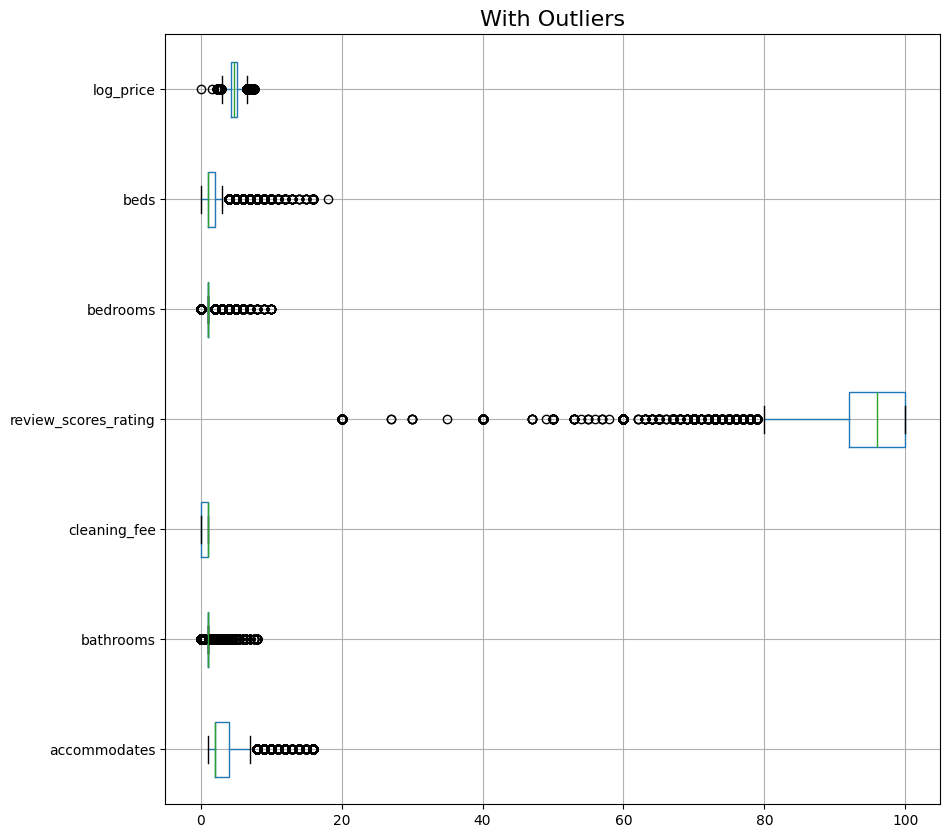

In [37]:
cont=df.dtypes[(df.dtypes != 'uint8') & (df.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert = 0)
plt.title('With Outliers',fontsize = 16)
plt.show()

## treated with knn algo

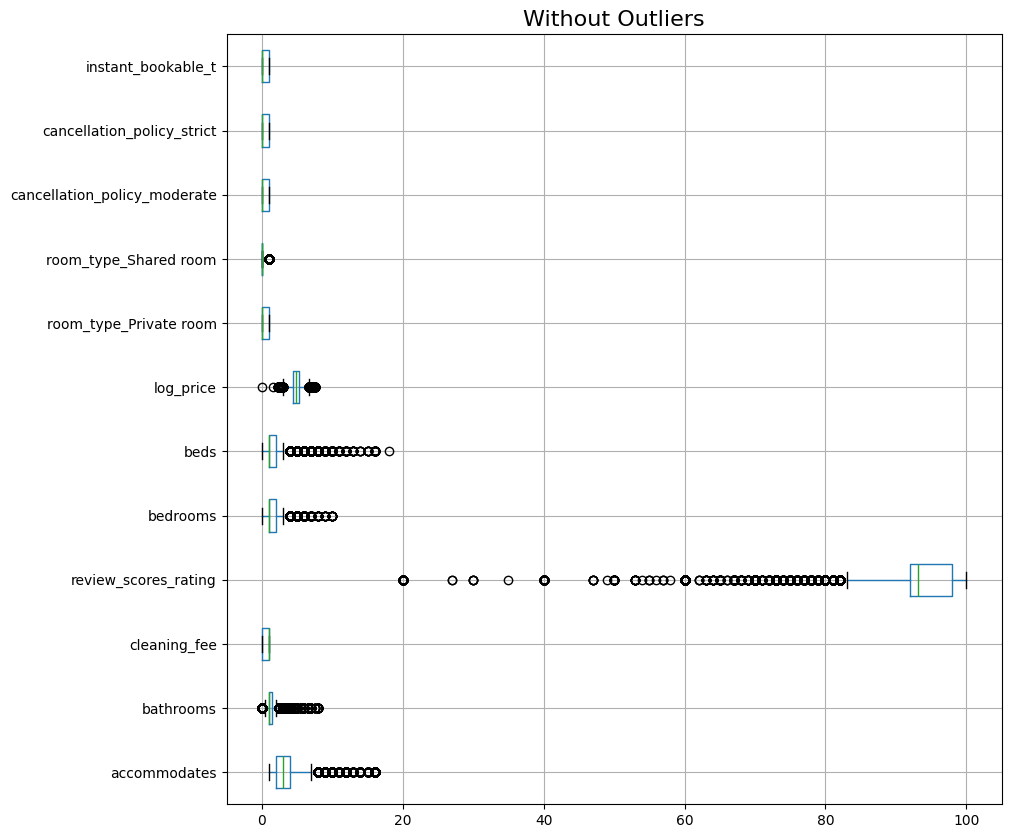

In [38]:
cont=df_knn.dtypes[(df_knn.dtypes != 'uint8') & (df_knn.dtypes != 'bool')].index
plt.figure(figsize=(10,10))
df_knn[cont].boxplot(vert = 0)
plt.title('Without Outliers',fontsize = 16)
plt.show()

## Exploratory data analysis

In [53]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1 - (1.5 * IQR)
    upper_range= Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [54]:
remove_outlier(df_mean['review_scores_rating'])

(83.0, 107.0)

In [ ]:
df_mean_out = df_mean.copy()


In [ ]:
df_med_out = df_med.copy()
df_knn_out = df_knn.copy()

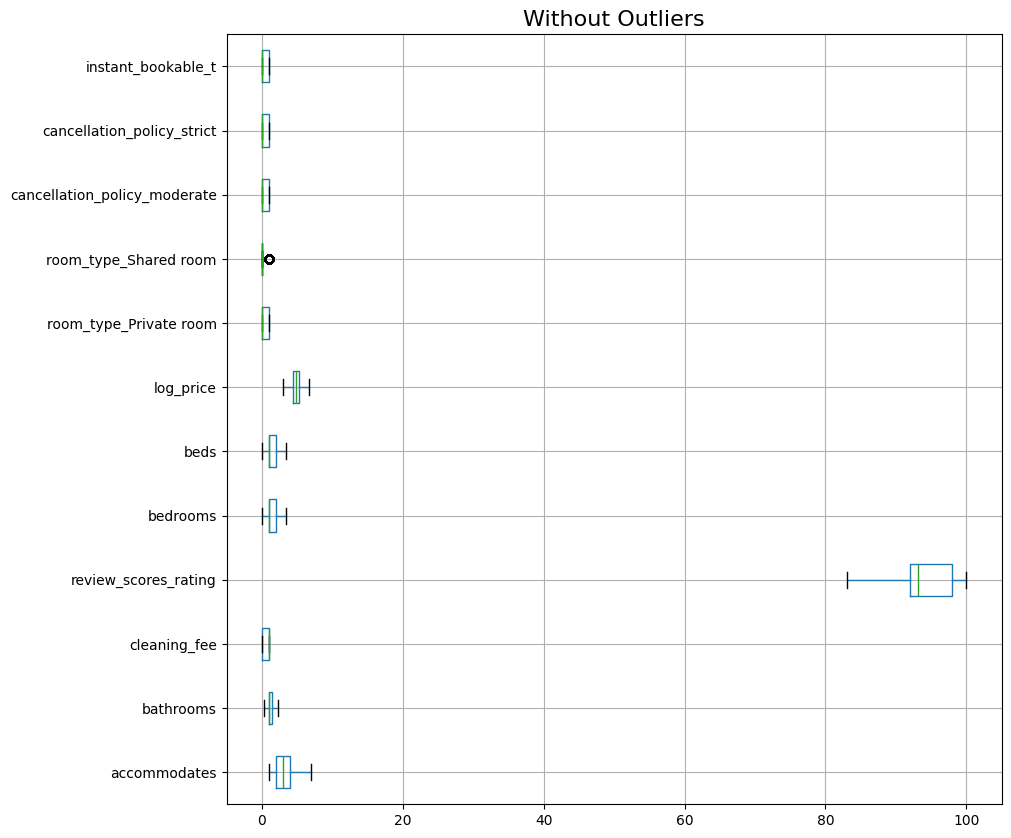

In [63]:
plt.figure(figsize=(10,10))
df_mean_out.boxplot(vert = 0)
plt.title('Without Outliers',fontsize = 16)
plt.show()

In [70]:
for column in df_mean_out.columns:
  lr,ur =remove_outlier(df_mean_out[column])
  df_mean_out[column]=np.where(df_mean_out[column]>ur,ur,df_mean_out[column])
  df_mean_out[column]=np.where(df_mean_out[column]<lr,lr,df_mean_out[column])

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

## data distribution

In [62]:
for column in df_mean_out.columns:
  lr,ur=remove_outlier(df_mean_out[column])
  df_mean_out[column]=np.where(df_mean_out[column]>ur,ur,df_mean_out[column])
  df_mean_out[column]=np.where(df_mean_out[column]<lr,lr,df_mean_out[column])

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

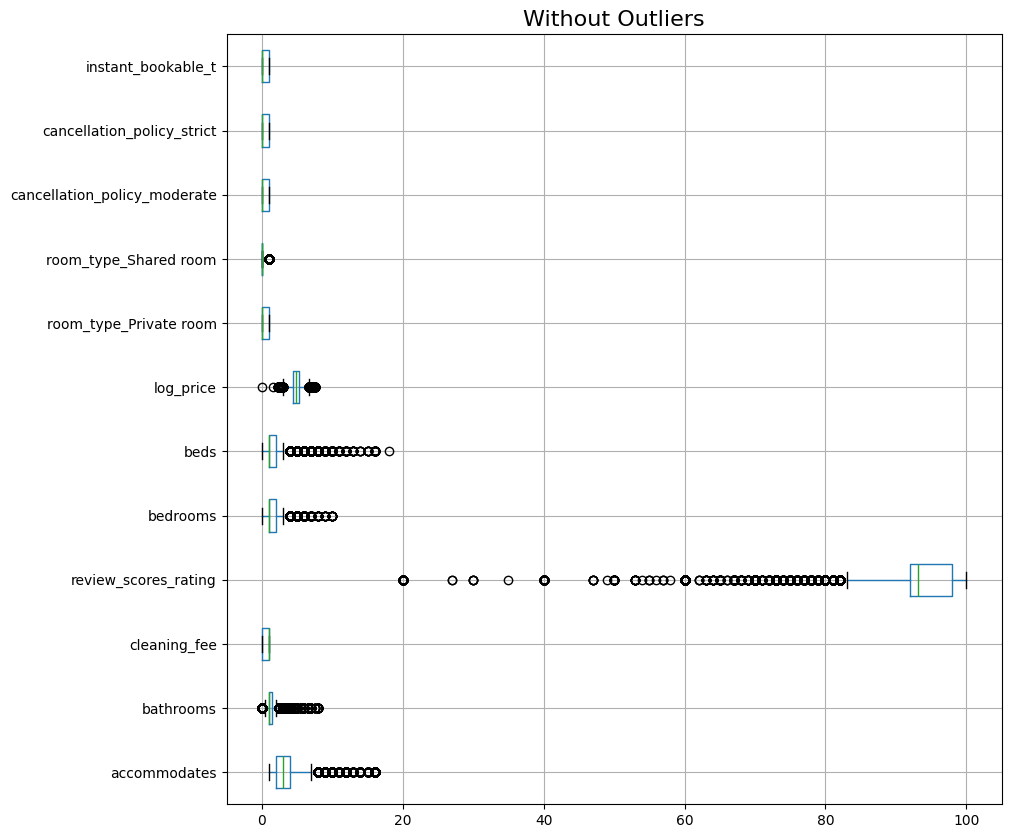

In [ ]:
plt.figure(figsize=(10,10))
df_mean_out.boxplot(vert = 0)
plt.title('Without Outliers',fontsize = 16)


In [43]:
plt.show()

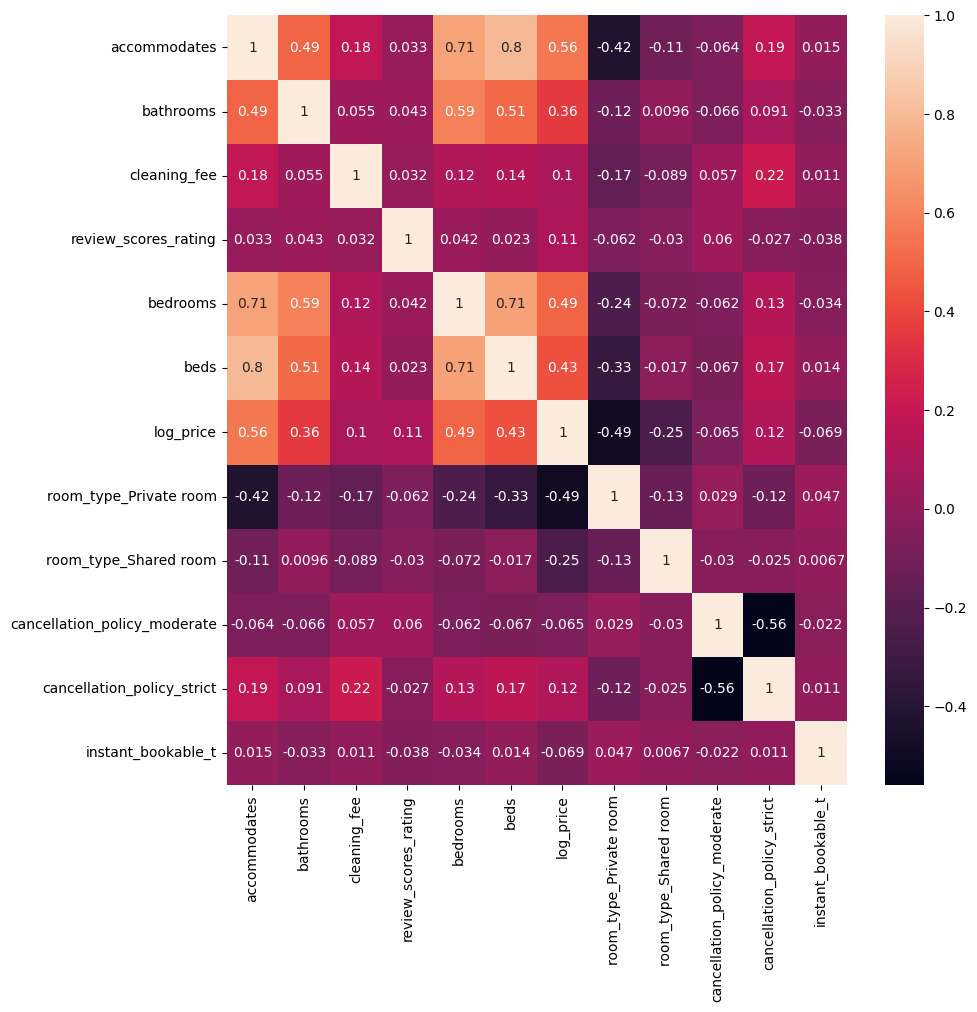

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(df_mean.corr(),annot=True)

plt.show()

# train test split

In [45]:
X = df_mean_out.drop('log_price',axis=1)
y = df_mean_out[['log_price']]


In [46]:
y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state =1)

# linear regression model

In [48]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [49]:
# df_mean_out
regression_model.score(X_train,y_train)

0.5026453886994027

In [50]:
#mean outlier not treated
X = df_mean.drop('log_price',axis=1)
y = df_mean[['log_price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state =1)
regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.5026453886994027

In [60]:
#med outlier treated
X = df_med_out.drop('log_price',axis=1)
y = df_med_out[['log_price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state =1)
regression_model.fit(X_train,y_train)


LinearRegression()

In [52]:
#med  outlier not treated
X = df_med.drop('log_price',axis=1)
y = df_med[['log_price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state =1)
regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.5026453886994027

In [67]:
#knn  outlier not treated
X = df_knn.drop('log_price',axis=1)
y = df_knn[['log_price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state =1)
regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.5026453886994027

In [68]:
#knn  outlier treated
X = df_knn_out.drop('log_price',axis=1)
y = df_knn_out[['log_price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state =1)
regression_model.fit(X_train,y_train)

regression_model.score(X_train,y_train)

0.5026453886994027